In [1]:
%autosave 0

Autosave disabled


# 4. Evaluation Metrics for Classification

In the previous session we trained a model for predicting churn. How do we know if it's good?


## 4.1 Evaluation metrics: session overview 

* Dataset: https://www.kaggle.com/blastchar/telco-customer-churn
* https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv


*Metric* - function that compares the predictions with the actual values and outputs a single number that tells how good the predictions are

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [3]:
df = pd.read_csv('./data/telco_data.csv')

df.columns = df.columns.str.lower().str.replace(' ', '_')

categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')

df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')
df.totalcharges = df.totalcharges.fillna(0)

df.churn = (df.churn == 'yes').astype(int)

In [6]:
df.head().T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


In [4]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

del df_train['churn']
del df_val['churn']
del df_test['churn']

In [5]:
numerical = ['tenure', 'monthlycharges', 'totalcharges']

categorical = [
    'gender',
    'seniorcitizen',
    'partner',
    'dependents',
    'phoneservice',
    'multiplelines',
    'internetservice',
    'onlinesecurity',
    'onlinebackup',
    'deviceprotection',
    'techsupport',
    'streamingtv',
    'streamingmovies',
    'contract',
    'paperlessbilling',
    'paymentmethod',
]

In [6]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

model = LogisticRegression()
model.fit(X_train, y_train)

/home/mahmud/Desktop/personal_tasks/ml-zoomcamp-solution/env_ml_zoomcamp_solution/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [7]:
val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

y_pred = model.predict_proba(X_val)[:, 1]
churn_decision = (y_pred >= 0.5)
(y_val == churn_decision).mean()

np.float64(0.8026969481902059)

## 4.2 Accuracy and dummy model

* Evaluate the model on different thresholds
* Check the accuracy of dummy baselines

In [11]:
len(y_val)

1409

In [12]:
(y_val == churn_decision).mean()

np.float64(0.8026969481902059)

In [13]:
1132/ 1409

0.8034066713981547

In [14]:
from sklearn.metrics import accuracy_score

In [15]:
accuracy_score(y_val, y_pred >= 0.5)

0.8026969481902059

In [16]:
thresholds = np.linspace(0, 1, 21)

scores = []

for t in thresholds:
    score = accuracy_score(y_val, y_pred >= t)
    print('%.2f %.3f' % (t, score))
    scores.append(score)

0.00 0.274
0.05 0.508
0.10 0.591
0.15 0.666
0.20 0.709
0.25 0.737
0.30 0.760
0.35 0.773
0.40 0.785
0.45 0.792
0.50 0.803
0.55 0.801
0.60 0.795
0.65 0.786
0.70 0.766
0.75 0.744
0.80 0.734
0.85 0.726
0.90 0.726
0.95 0.726
1.00 0.726


The best score is indeed for 0.5 threshold

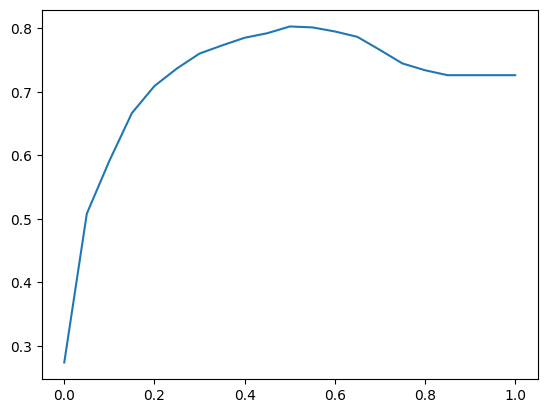

In [17]:
plt.plot(thresholds, scores)

In [18]:
from collections import Counter

In [19]:
Counter(y_pred >= 1.0)

Counter({np.False_: 1409})

In [20]:
1 - y_val.mean()

np.float64(0.7260468417317246)

In case of theshold=1.0, event though the model is predicting everything as Negative, it's 72.6% accurate!  This is a **problem**

## 4.3 Confusion table

* Different types of errors and correct decisions
* Arranging them in a table

In [8]:
actual_positive = (y_val == 1)
actual_negative = (y_val == 0)

In [9]:
t = 0.5
predict_positive = (y_pred >= t)
predict_negative = (y_pred < t)

In [10]:
tp = (predict_positive & actual_positive).sum()
tn = (predict_negative & actual_negative).sum()

fp = (predict_positive & actual_negative).sum()
fn = (predict_negative & actual_positive).sum()

In [11]:
confusion_matrix = np.array([
    [tn, fp],
    [fn, tp]
])
confusion_matrix

array([[921, 102],
       [176, 210]])

In [30]:
#getting the percentage
(confusion_matrix / confusion_matrix.sum()).round(2)

array([[0.65, 0.07],
       [0.12, 0.15]])

## 4.4 Precision and Recall

In [12]:
p = tp / (tp + fp)
p

np.float64(0.6730769230769231)

In [13]:
r = tp / (tp + fn)
r

np.float64(0.5440414507772021)

## 4.5 ROC Curves

### TPR and FRP

In [14]:
tpr = tp / (tp + fn)   #recall
tpr

np.float64(0.5440414507772021)

In [15]:
fpr = fp / (fp + tn)   #sensitivity
fpr

np.float64(0.09970674486803519)

In [36]:
scores = []

thresholds = np.linspace(0, 1, 101) #taking 100 threshold values

for t in thresholds:
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)
    
    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)

    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()

    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()
    
    scores.append((t, tp, fp, fn, tn))

In [37]:
columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
df_scores = pd.DataFrame(scores, columns=columns)

df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)

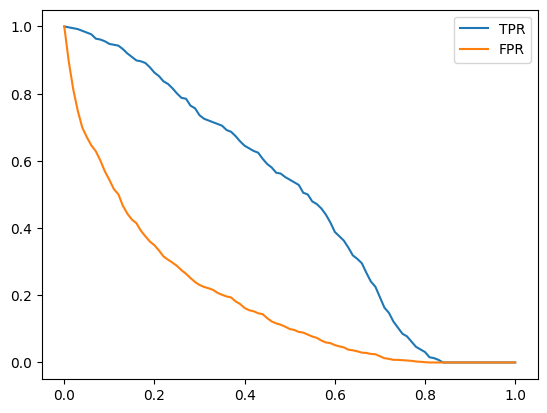

In [38]:
plt.plot(df_scores.threshold, df_scores['tpr'], label='TPR')
plt.plot(df_scores.threshold, df_scores['fpr'], label='FPR')
plt.legend()

### Random model

In [39]:
np.random.seed(1)
y_rand = np.random.uniform(0, 1, size=len(y_val))            #getting uniformly distributed random number between 0 and 1

(array([139., 141., 129., 139., 139., 149., 147., 140., 144., 142.]),
 array([1.14374817e-04, 9.99549880e-02, 1.99795601e-01, 2.99636214e-01,
        3.99476828e-01, 4.99317441e-01, 5.99158054e-01, 6.98998667e-01,
        7.98839281e-01, 8.98679894e-01, 9.98520507e-01]),
 <BarContainer object of 10 artists>)

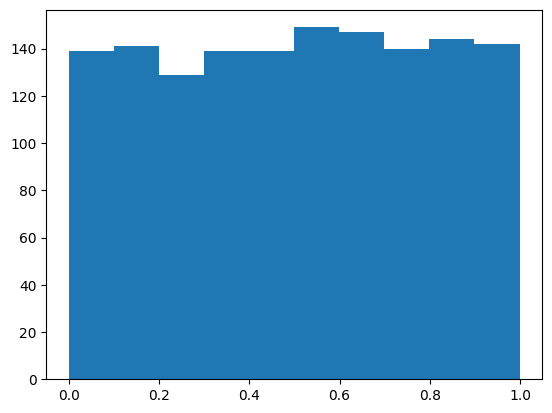

In [43]:
plt.hist(y_rand)

In [44]:
((y_rand >= 0.5) == y_val).mean()

np.float64(0.5017743080198722)

In [60]:
def tpr_fpr_dataframe(y_val, y_pred):
    scores = []

    thresholds = np.linspace(0, 1, 101)

    for t in thresholds:
        actual_positive = (y_val == 1)
        actual_negative = (y_val == 0)

        predict_positive = (y_pred >= t)
        predict_negative = (y_pred < t)

        tp = (predict_positive & actual_positive).sum()
        tn = (predict_negative & actual_negative).sum()

        fp = (predict_positive & actual_negative).sum()
        fn = (predict_negative & actual_positive).sum()

        scores.append((t, tp, fp, fn, tn))

    columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
    df_scores = pd.DataFrame(scores, columns=columns)

    df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
    df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)
    
    return df_scores

In [46]:
df_rand = tpr_fpr_dataframe(y_val, y_rand)

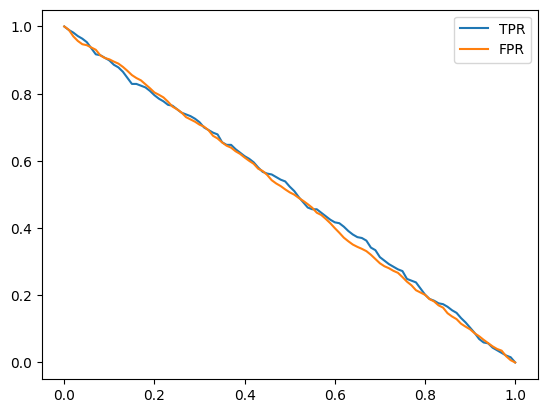

In [47]:
plt.plot(df_rand.threshold, df_rand['tpr'], label='TPR')
plt.plot(df_rand.threshold, df_rand['fpr'], label='FPR')
plt.legend()

### Ideal model

In [48]:
num_neg = (y_val == 0).sum()
num_pos = (y_val == 1).sum()
num_neg, num_pos

(np.int64(1023), np.int64(386))

In [49]:

y_ideal = np.repeat([0, 1], [num_neg, num_pos])  # np.repeat([x,y], [z,w]) - returns a numpy array with a z number of x values, and a w number of y values.
y_ideal

y_ideal_pred = np.linspace(0, 1, len(y_val))

In [50]:
1 - y_val.mean()    #getting percetage of false val

np.float64(0.7260468417317246)

In [51]:
accuracy_score(y_ideal, y_ideal_pred >= 0.726)

1.0

In [52]:
df_ideal = tpr_fpr_dataframe(y_ideal, y_ideal_pred)
df_ideal[::10]

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.0,386,1023,0,0,1.000000,1.000000
10,0.1,386,882,0,141,1.000000,0.862170
20,0.2,386,741,0,282,1.000000,0.724340
30,0.3,386,600,0,423,1.000000,0.586510
40,0.4,386,459,0,564,1.000000,0.448680
50,0.5,386,319,0,704,1.000000,0.311828
60,0.6,386,178,0,845,1.000000,0.173998
70,0.7,386,37,0,986,1.000000,0.036168
80,0.8,282,0,104,1023,0.730570,0.000000
90,0.9,141,0,245,1023,0.365285,0.000000


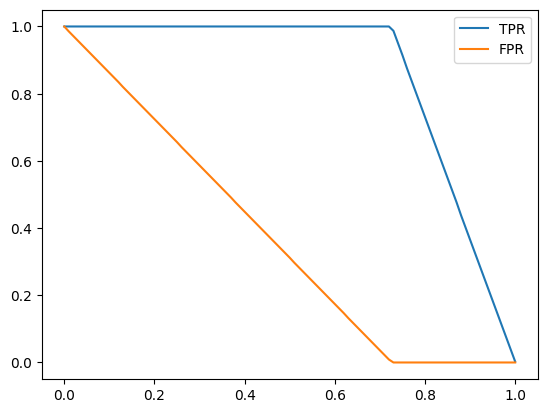

In [53]:
plt.plot(df_ideal.threshold, df_ideal['tpr'], label='TPR')
plt.plot(df_ideal.threshold, df_ideal['fpr'], label='FPR')
plt.legend()

### Putting everything together

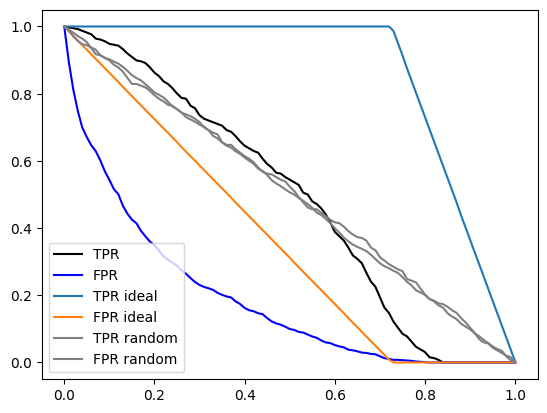

In [55]:
plt.plot(df_scores.threshold, df_scores['tpr'], label='TPR', color='black')
plt.plot(df_scores.threshold, df_scores['fpr'], label='FPR', color='blue')

plt.plot(df_ideal.threshold, df_ideal['tpr'], label='TPR ideal')
plt.plot(df_ideal.threshold, df_ideal['fpr'], label='FPR ideal')

plt.plot(df_rand.threshold, df_rand['tpr'], label='TPR random', color='grey')
plt.plot(df_rand.threshold, df_rand['fpr'], label='FPR random', color='grey')

plt.legend()

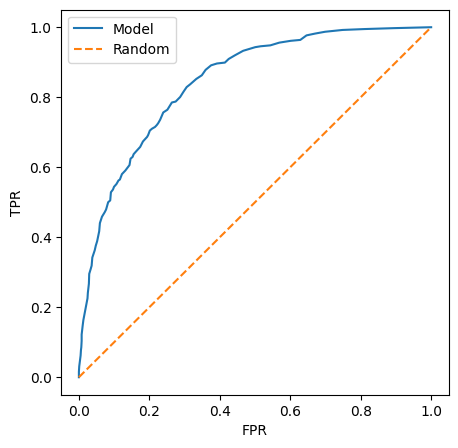

In [56]:
plt.figure(figsize=(5, 5))

plt.plot(df_scores.fpr, df_scores.tpr, label='Model')
plt.plot([0, 1], [0, 1], label='Random', linestyle='--')

plt.xlabel('FPR')
plt.ylabel('TPR')

plt.legend()

In [57]:
from sklearn.metrics import roc_curve

In [59]:
fpr, tpr, thresholds = roc_curve(y_val, y_pred)

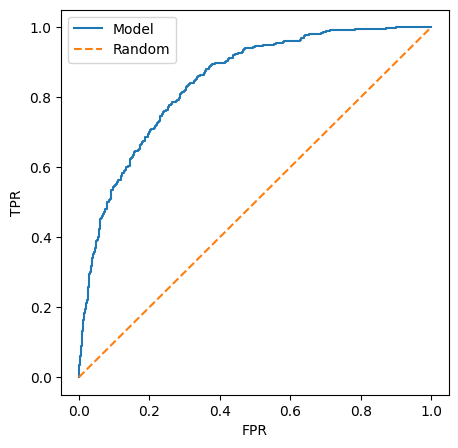

In [60]:
plt.figure(figsize=(5, 5))

plt.plot(fpr, tpr, label='Model')
plt.plot([0, 1], [0, 1], label='Random', linestyle='--')

plt.xlabel('FPR')
plt.ylabel('TPR')

plt.legend()

## 4.6 ROC AUC

* Area under the ROC curve - useful metric
* Interpretation of AUC

In [61]:
from sklearn.metrics import auc

In [62]:
auc(fpr, tpr)

np.float64(0.8438884921418767)

In [63]:
auc(df_scores.fpr, df_scores.tpr)

np.float64(0.8436415804375021)

In [64]:
auc(df_ideal.fpr, df_ideal.tpr)

np.float64(0.9999430203759136)

In [65]:
#METHOD 1
fpr, tpr, thresholds = roc_curve(y_val, y_pred)
auc(fpr, tpr)

np.float64(0.8438884921418767)

In [66]:
#METHOD 2
from sklearn.metrics import roc_auc_score
roc_auc_score(y_val, y_pred)

np.float64(0.8438884921418767)

In [67]:
#Getting AUC score interpretation
neg = y_pred[y_val == 0]
pos = y_pred[y_val == 1]

In [68]:
import random

In [69]:
n = 100000
success = 0 

for i in range(n):
    pos_ind = random.randint(0, len(pos) - 1)
    neg_ind = random.randint(0, len(neg) - 1)

    if pos[pos_ind] > neg[neg_ind]:
        success = success + 1

success / n

0.84478

In [70]:
n = 50000

np.random.seed(1)
pos_ind = np.random.randint(0, len(pos), size=n)
neg_ind = np.random.randint(0, len(neg), size=n)

(pos[pos_ind] > neg[neg_ind]).mean()

np.float64(0.84662)

**The interpretation of AUC:**  
The probability of a randomly selected positive example having a greater score than a randomly selected negative example =AUC

## 4.7 Cross-Validation

* Evaluating the same model on different subsets of data
* Getting the average prediction and the spread within predictions

In [71]:
def train(df_train, y_train, C=1.0):
    dicts = df_train[categorical + numerical].to_dict(orient='records')       #getting dataframe as dictionary

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)                                       #OHE

    model = LogisticRegression(C=C, max_iter=1000)
    model.fit(X_train, y_train)
    
    return dv, model

In [72]:
dv, model = train(df_train, y_train, C=0.001)

In [73]:
def predict(df, dv, model):
    dicts = df[categorical + numerical].to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [74]:
y_pred = predict(df_val, dv, model)

In [82]:
(y_val==(y_pred>=0.5)).mean()

np.float64(0.7998580553584103)

In [86]:
roc_auc_score(y_val, y_pred)

np.float64(0.8265641539918659)

In [83]:
from sklearn.model_selection import KFold

In [88]:
import warnings
warnings. filterwarnings('ignore')

In [84]:
# !pip install tqdm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 1.1 MB/s eta 0:00:00ta 0:00:01

[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [85]:
from tqdm.auto import tqdm

/home/mahmud/Desktop/personal_tasks/ml-zoomcamp-solution/env_ml_zoomcamp_solution/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [89]:
#parameter tuning
n_splits = 5

for C in tqdm([0.001, 0.01, 0.1, 0.5, 1, 5, 10]):
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)

    scores = []

    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train = df_train.churn.values
        y_val = df_val.churn.values

        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)

    print('C=%s %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))

 14%|█▍        | 1/7 [00:03<00:21,  3.53s/it]

C=0.001 0.825 +- 0.009


 29%|██▊       | 2/7 [00:07<00:19,  3.94s/it]

C=0.01 0.840 +- 0.008


 43%|████▎     | 3/7 [00:10<00:12,  3.19s/it]

C=0.1 0.842 +- 0.007


 57%|█████▋    | 4/7 [00:12<00:08,  2.75s/it]

C=0.5 0.842 +- 0.007


 71%|███████▏  | 5/7 [00:14<00:05,  2.59s/it]

C=1 0.842 +- 0.007


 86%|████████▌ | 6/7 [00:16<00:02,  2.48s/it]

C=5 0.842 +- 0.007


100%|██████████| 7/7 [00:18<00:00,  2.71s/it]

C=10 0.842 +- 0.007


In [90]:
scores

[np.float64(0.8446004819806737),
 np.float64(0.8451839988081049),
 np.float64(0.8333132651013446),
 np.float64(0.8347848852081603),
 np.float64(0.8516598161337894)]

In [91]:
#training final model
dv, model = train(df_full_train, df_full_train.churn.values, C=1.0)
y_pred = predict(df_test, dv, model)

auc = roc_auc_score(y_test, y_pred)
auc

np.float64(0.8584005005037537)

## 4.8 Summary

* Metric - a single number that describes the performance of a model
* Accuracy - fraction of correct answers; sometimes misleading 
* Precision and recall are less misleading when we have class inbalance
* ROC Curve - a way to evaluate the performance at all thresholds; okay to use with imbalance
* K-Fold CV - more reliable estimate for performance (mean + std)

## 4.9 Explore more

* Check the precision and recall of the dummy classifier that always predict "FALSE"
* F1 score = 2 * P * R / (P + R)
* Evaluate precision and recall at different thresholds, plot P vs R - this way you'll get the precision/recall curve (similar to ROC curve)
* Area under the PR curve is also a useful metric

Other projects:

* Calculate the metrics for datasets from the previous week

#### Getting Accuracy,Precision, Recall and F1 score for Random model

In [16]:
np.random.seed(1)
y_rand = np.random.uniform(0, 1, size=len(y_val))    

In [17]:
((y_rand >= 0.5) == y_val).mean()

np.float64(0.5017743080198722)

In [19]:
y_rand

array([4.17022005e-01, 7.20324493e-01, 1.14374817e-04, ...,
       7.73916250e-01, 3.34276405e-01, 8.89982208e-02])

In [20]:
#confusion matrix for random model
actual_positive = (y_val == 1)
actual_negative = (y_val == 0)

t=0.5
predict_positive = (y_rand >= t)
predict_negative = (y_rand < t)

tp = (predict_positive & actual_positive).sum()
tn = (predict_negative & actual_negative).sum()

fp = (predict_positive & actual_negative).sum()
fn = (predict_negative & actual_positive).sum()

confusion_matrix = np.array([
    [tn, fp],
    [fn, tp]
])
confusion_matrix

array([[505, 518],
       [184, 202]])

In [24]:
## 4.4 Precision and Recall
a=(tn+tp)/confusion_matrix.sum()  #accuracy
p = tp / (tp + fp)                #precision
r = tp / (tp + fn)                #recall

a,p,r

(np.float64(0.5017743080198722),
 np.float64(0.28055555555555556),
 np.float64(0.5233160621761658))

* 50% accuracy means, our model correctly predicted 50% cases
* 28% precision means, whatever our model predicted to be positive (churn), only 28% of them were correct
* 52% recall means, our model correctly predicted 52% positive (churn) of all actual/real positive (churn)

In [26]:
#F1 Score
f1_score=(2*p*r)/(p+r)
f1_score

np.float64(0.3652802893309222)

#### Getting Scores for Dummy model which always predicts False

In [82]:
y_dummy=np.zeros(shape=len(y_val))

In [83]:
y_dummy

array([0., 0., 0., ..., 0., 0., 0.])

In [84]:
#confusion matrix for dummy model
actual_positive = (y_val == 1)
actual_negative = (y_val == 0)

t=0.5
predict_positive = (y_dummy >= t)
predict_negative = (y_dummy < t)

tp = (predict_positive & actual_positive).sum()
tn = (predict_negative & actual_negative).sum()

fp = (predict_positive & actual_negative).sum()
fn = (predict_negative & actual_positive).sum()

confusion_matrix = np.array([
    [tn, fp],
    [fn, tp]
])
confusion_matrix

array([[1023,    0],
       [ 386,    0]])

In [85]:
## 4.4 Precision and Recall
a=(tn+tp)/confusion_matrix.sum()  #accuracy
p = tp / (tp + fp)                #precision
r = tp / (tp + fn)                #recall

a,p,r

/tmp/ipykernel_247694/1829206008.py:3: RuntimeWarning: invalid value encountered in scalar divide
  p = tp / (tp + fp)                #precision


(np.float64(0.7260468417317246), np.float64(nan), np.float64(0.0))

* 73% accuracy means, the dummy model correctly predicted 73% cases
* Invalid precision means, the dummy model didn't predict anything to be positive (churn). precision in such cases is considered 0
* 0% recall means, it fails to capture any actual positive instances

In [86]:
#F1 Score
f1_score=(2*p*r)/(p+r)
f1_score

np.float64(nan)

Recall is 0. F1 score will be 0 if we consider precision =0

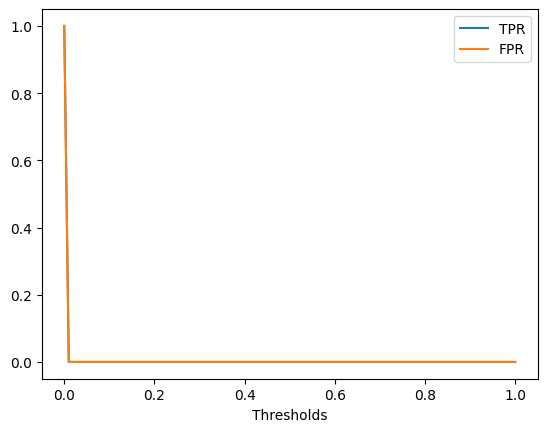

In [87]:
df_dummy_score = tpr_fpr_dataframe(y_val, y_dummy)
plt.plot(df_dummy_score.threshold, df_dummy_score['tpr'], label='TPR')
plt.plot(df_dummy_score.threshold, df_dummy_score['fpr'], label='FPR')

plt.xlabel('Thresholds')

plt.legend()

In [73]:
# df_dummy_score.fpr
df_dummy_score.tpr

0      1.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
96     0.0
97     0.0
98     0.0
99     0.0
100    0.0
Name: tpr, Length: 101, dtype: float64

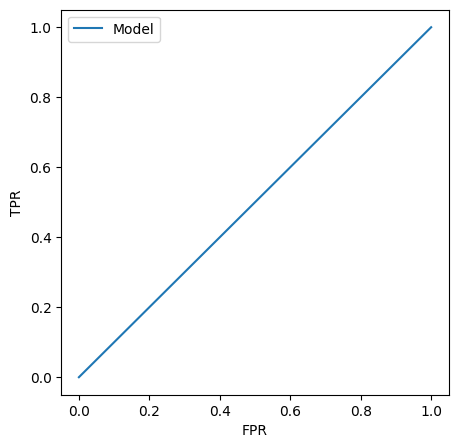

In [70]:
plt.figure(figsize=(5, 5))

plt.plot(df_dummy_score.fpr, df_dummy_score.tpr, label='Model')
# plt.plot([0, 1], [0, 1], label='Random', linestyle='--')

plt.xlabel('FPR')
plt.ylabel('TPR')

plt.legend()

In [66]:
#getting auc score
from sklearn.metrics import roc_curve,auc
fpr, tpr, thresholds = roc_curve(y_val, y_dummy)
auc_score=auc(fpr, tpr)
print(auc_score)

0.5


Even though the model always predicts "Negative", the AUC-ROC score would be 0.5, because it measures the ability of the model to separate classes. In this case, the model has no discriminatory power and is **equivalent to random guessing.**

#### Getting Scores for Dummy model which always predicts True

In [88]:
y_dummy=np.ones(shape=len(y_val))
y_dummy

array([1., 1., 1., ..., 1., 1., 1.])

In [89]:
#confusion matrix for random model
actual_positive = (y_val == 1)
actual_negative = (y_val == 0)

t=0.5
predict_positive = (y_dummy >= t)
predict_negative = (y_dummy < t)

tp = (predict_positive & actual_positive).sum()
tn = (predict_negative & actual_negative).sum()

fp = (predict_positive & actual_negative).sum()
fn = (predict_negative & actual_positive).sum()

confusion_matrix = np.array([
    [tn, fp],
    [fn, tp]
])
confusion_matrix

array([[   0, 1023],
       [   0,  386]])

In [90]:
## 4.4 Precision and Recall
a=(tn+tp)/confusion_matrix.sum()  #accuracy
p = tp / (tp + fp)                #precision
r = tp / (tp + fn)                #recall

a,p,r

(np.float64(0.2739531582682754),
 np.float64(0.2739531582682754),
 np.float64(1.0))

* 27% accuracy means, the dummy model correctly predicted 27% cases
* 27% precision means, whatever the dummy model predicted to be positive (churn), only 27% of them were correct
* 100% recall means, the dummy model correctly predicted 100% positive (churn) of all actual/real positive (churn)

In [91]:
#F1 Score
f1_score=(2*p*r)/(p+r)
f1_score

np.float64(0.43008356545961)

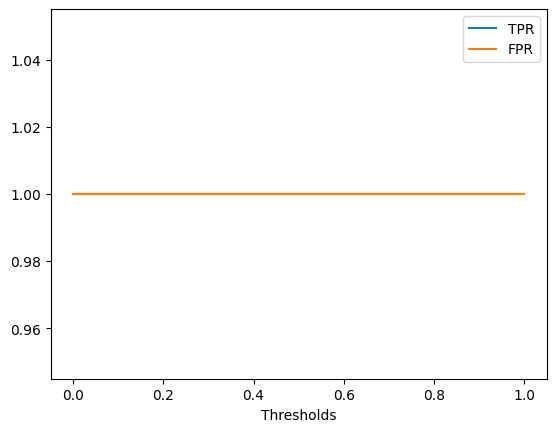

In [92]:
df_dummy_score = tpr_fpr_dataframe(y_val, y_dummy)
plt.plot(df_dummy_score.threshold, df_dummy_score['tpr'], label='TPR')
plt.plot(df_dummy_score.threshold, df_dummy_score['fpr'], label='FPR')

plt.xlabel('Thresholds')

plt.legend()

In [95]:
# df_dummy_score.fpr
df_dummy_score.tpr

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
96     1.0
97     1.0
98     1.0
99     1.0
100    1.0
Name: tpr, Length: 101, dtype: float64

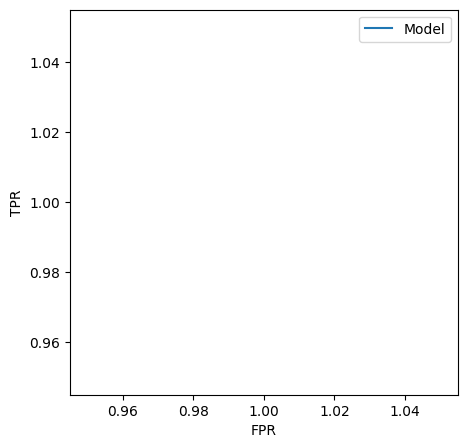

In [98]:
plt.figure(figsize=(5, 5))

plt.plot(df_dummy_score.fpr, df_dummy_score.tpr, label='Model')
# plt.plot([0, 1], [0, 1], label='Random', linestyle='--')

plt.xlabel('FPR')
plt.ylabel('TPR')

plt.legend()

In [99]:
#getting auc score
from sklearn.metrics import roc_curve,auc
fpr, tpr, thresholds = roc_curve(y_val, y_dummy)
auc_score=auc(fpr, tpr)
print(auc_score)

0.5


Even though the model always predicts "Negative", the AUC-ROC score would be 0.5, because it measures the ability of the model to separate classes. In this case, the model has no discriminatory power and is **equivalent to random guessing.**